## HW 02 - Biophysical Chemistry
Prabh Deol <br>
Due Date: Feb. 11, 2026

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

#### Problem A3

In [2]:
df = pd.read_csv('Data/pV_adiabatic.csv', names=['Pressure (Pa)', 'Volume (m^3)'])

pressure = df['Pressure (Pa)']
volume = df['Volume (m^3)']

In [3]:
def pressure_adiabatic(V, ꟛ, Ɣ):
  p = ꟛ/(V**Ɣ)
  return p

par, cov = curve_fit(pressure_adiabatic, pressure, volume)

ꟛ = par[0]; dꟛ = cov[0, 0]
Ɣ = par[1]; dƔ = cov[1, 1]

print(f'{ꟛ = :.0f} +/- {dꟛ:.0f}')
print(f'{Ɣ = :.5f} +/- {dƔ:.5f}')

ꟛ = 97 +/- 10
Ɣ = 1.67079 +/- 0.00002


Here, $\gamma = 1.67079 \approx \frac{5}{3}$, which implies that the gas is **MONOATOMIC**

#### Problem B1
(SEE WRITTEN WORK FOR DESCRIPTIONS OF CURVES)

In [4]:
def van_der_Waals(V, n, R, T, a, b):
  p = ( n*R*T )/( V - n*b )  -   ( a * n**2 )/( V**2 )
  return p

# parameter values
temps = [200, 230, 270, 300, 400, 800]

a = 0.3687      # Pa m^6 mol^-2
b = 4.62e-5     # m^3 mol^-1

R = 8.314       # Pa m^3 K^-1 mol^-1
n = 1

data_points = 10_000
vols = np.linspace(0 + 1e-6, 0.001, data_points)

isotherms = []
for temp in temps:
  isotherms.append(van_der_Waals(vols, n, R, temp, a, b))

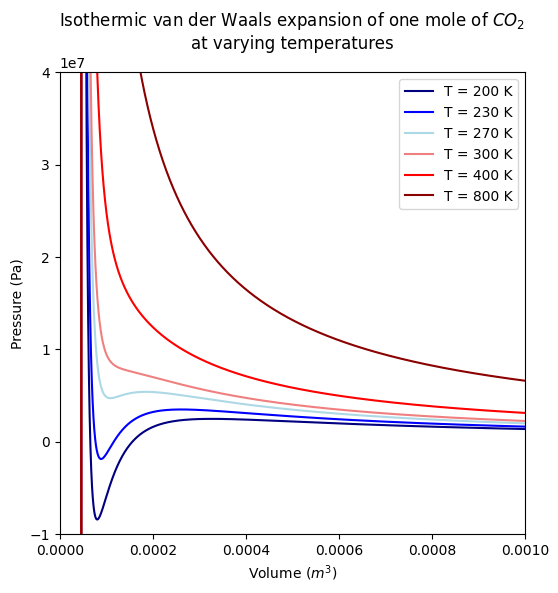

In [18]:
colors = ['navy', 'blue', 'lightblue', 'lightcoral', 'red', 'darkred']
plt.figure(figsize = (6,6))
for isotherm, color, temp in zip(isotherms, colors, temps):
  plt.plot(vols, isotherm, color=color, label = f'T = {temp} K')

plt.xlim(0e-3, 1e-3)
plt.xlabel('Volume ($m^3$)')
plt.ylim(-1e7, 4e7)
plt.ylabel('Pressure (Pa)')
plt.legend()

plt.title(
  'Isothermic van der Waals expansion of one mole of $CO_2$\n'
  'at varying temperatures'
)
plt.show()

#### Problem B2

(SEE WRITTEN WORK FOR EXPLANATION OF ATTRACTIVE/REPULSIVE PARTS)

In [6]:
def ideal_gas(V, n, R, T):
  p = ( n*R*T )/( V )
  return p

def second_term(V, n, a):
  return -( a * n**2 )/( V**2 )

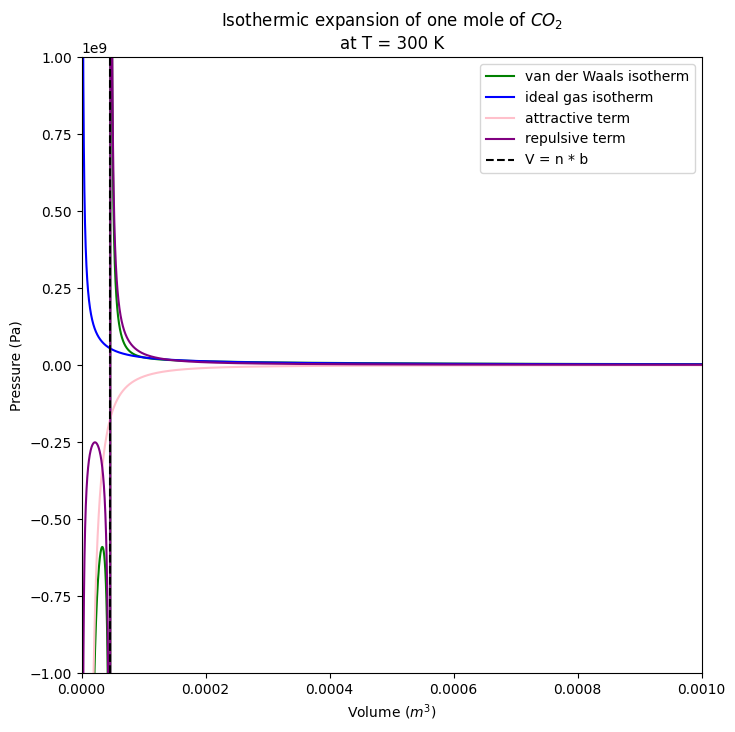

In [16]:
curve_1 = isotherms[4]
curve_2 = ideal_gas(vols, n, R, 300)
curve_3 = second_term(vols, n, a)
curve_4 = curve_1 - curve_2 - curve_3

plt.figure(figsize = (8,8))
plt.plot(vols, curve_1, color = 'green', label = 'van der Waals isotherm')
plt.plot(vols, curve_2, color = 'blue', label = 'ideal gas isotherm')
plt.plot(vols, curve_3, color = 'pink', label = 'attractive term')
plt.plot(vols, curve_4, color = 'purple', label = 'repulsive term')

plt.xlim(0e-3, 1e-3)
plt.xlabel('Volume ($m^3$)')
plt.ylim(-1e9, 1e9)

plt.axvline(x = n*b, linestyle = '--', color = 'black', label = 'V = n * b')
plt.ylabel('Pressure (Pa)')
plt.legend()

plt.title(
  'Isothermic expansion of one mole of $CO_2$\n'
  'at T = 300 K'
)
plt.show()

#### Problem B3

In [8]:
def reversible_isothermal_work(n, R, T, a, b, V_i, V_f):
  term1 = (n * R * T) * (math.log(V_i - n*b) - math.log(V_f - n*b))
  term2 = a * math.pow(n, 2)*((1/V_f) - (1/V_i))
  return term1 - term2

W = reversible_isothermal_work(n=n, R=R, T=300, a=a, b=b, V_i = 0.0005, V_f = 0.002)

print(f'{W = }')

W = -3088.1699777576873


#### Problem B4a

In [9]:
def U_vdW(n, R, T, a, V):
  U = (3/2) * n * R * T - (a * math.pow(n, 2))/V
  return U

U_f = U_vdW(n=n, R=R, T=300, a=a, V = 0.002)
U_i = U_vdW(n=n, R=R, T=300, a=a, V = 0.0005)
ΔU = U_f - U_i

print(f'{ΔU = }')

ΔU = 553.0500000000002


#### Problem B5

In [10]:
Q = ΔU - W
print(f'{Q = }')

Q = 3641.2199777576875


#### Problem C3

In [11]:
R = 8.314     # J mol ^-1 K^-1

C_p_CO2 = 7*R/2   # J * mol^-1 K^-1
C_p_H2O = 4*R     # J * mol^-1 K^-1

# convert to kJ * kg^-1 K^-1
def convert(C_p, molar_mass):
  C_p /= 1000               # kJ * mol^-1 K^-1
  C_p *= (1/molar_mass)     # kJ * g^-1 K^-1
  C_p *= 1000               # kJ * kg^-1 K^-1
  return C_p


CO2_mm = 44.00900   # g/mol
H2O_mm = 18.01528   # g/mol

C_p_CO2 = convert(C_p_CO2, CO2_mm)
C_p_H2O = convert(C_p_H2O, H2O_mm)

print(f'{C_p_CO2 = :.3f}')
print(f'{C_p_H2O = :.3f}')

C_p_CO2 = 0.661
C_p_H2O = 1.846
